In [5]:
import sys; import os
!{sys.executable} -m pip install Pillow==6.1

In [1]:
import sys; import os
from fastai.vision import *
import wandb
from wandb.fastai import WandbCallback

/opt/conda/lib/python3.6/site-packages/torchvision/io/_video_opt.py:17: UserWarning: video reader based on ffmpeg c++ ops not available
  warnings.warn("video reader based on ffmpeg c++ ops not available")


In [2]:
rootname = 'emotions/emotions-RAF_Face_Database_basic'
wandb.init(project=rootname.replace('/', '-').lower())
path = Path('data')/rootname

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


In [10]:
# TODO: homogenize color profiles of training and testing pictures because the 
# in the wild data often has color profiles indicative of emotions

np.random.seed(46)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
_tfms = get_transforms()
tfms = [_tfms[0]+[flip_lr()], _tfms[1]+[flip_lr()]]
data = ImageDataBunch.from_csv(
    path=Path('data')/rootname, 
    csv_labels='cleaned.csv',
    valid_pct=0.2,
    ds_tfms=tfms,
    size=224,
    num_workers=4,).normalize(imagenet_stats)

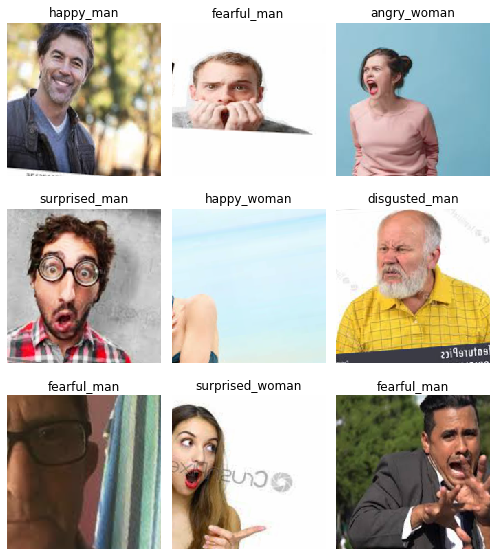

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [79]:
print('classes:', len(data.classes))
print('samples in training:', len(data.train_ds))
print('samples in validation:', len(data.valid_ds))

classes: 14
samples in training: 895
samples in validation: 223


In [80]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=WandbCallback)

In [86]:
learn.unfreeze()

In [94]:
learn.lr_find()

Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


Loaded best saved model from /course-v3/nbs/dl1/wandb/run-20200516_072327-1altb7ba/bestmodel.pth
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


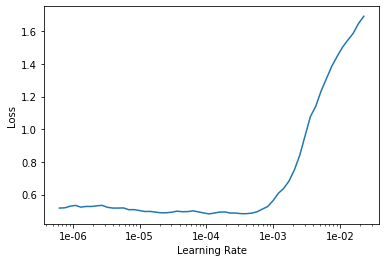

In [95]:
learn.recorder.plot()

In [96]:
# max_lr=slice(1.5e-5,1.1e-5), 
learn.fit_one_cycle(200, max_lr=slice(1.5e-5,1e-4), callbacks=WandbCallback(learn, input_type='images'))

epoch,train_loss,valid_loss,error_rate,time
0,0.490206,2.171519,0.605381,00:19
1,0.480999,2.165044,0.591928,00:19
2,0.499581,2.168615,0.596413,00:19
3,0.492338,2.168056,0.596413,00:19
4,0.487211,2.162234,0.591928,00:19
5,0.485685,2.167459,0.582960,00:19
6,0.486750,2.171360,0.591928,00:19
7,0.474231,2.165999,0.578475,00:19
8,0.465753,2.156106,0.587444,00:19
9,0.464875,2.158680,0.591928,00:19


Better model found at epoch 0 with valid_loss value: 2.1715188026428223.


Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


Better model found at epoch 0 with valid_loss value: 2.1715188026428223.
Better model found at epoch 1 with valid_loss value: 2.1650443077087402.
Better model found at epoch 1 with valid_loss value: 2.1650443077087402.
Better model found at epoch 4 with valid_loss value: 2.16223406791687.
Better model found at epoch 4 with valid_loss value: 2.16223406791687.
Better model found at epoch 8 with valid_loss value: 2.1561057567596436.
Better model found at epoch 8 with valid_loss value: 2.1561057567596436.
Better model found at epoch 10 with valid_loss value: 2.154857635498047.
Better model found at epoch 10 with valid_loss value: 2.154857635498047.
Better model found at epoch 17 with valid_loss value: 2.1513161659240723.
Better model found at epoch 17 with valid_loss value: 2.1513161659240723.
Loaded best saved model from /course-v3/nbs/dl1/wandb/run-20200516_072327-1altb7ba/bestmodel.pth
Loaded best saved model from /course-v3/nbs/dl1/wandb/run-20200516_072327-1altb7ba/bestmodel.pth


KeyboardInterrupt: 

In [72]:
latest_run = 'run-20200516_072327-1altb7ba'
best_model = '/course-v3/nbs/dl1/wandb/{}/bestmodel'.format(latest_run)

In [73]:
learn.load(best_model)

Learner(data=ImageDataBunch;

Train: LabelList (1466 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sad_woman,sad_woman,sad_woman,sad_woman,sad_woman
Path: data/emotions;

Valid: LabelList (366 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprised_woman,fearful_man,happy_woman,disgusted_man,happy_woman
Path: data/emotions;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps

In [74]:
interp = ClassificationInterpretation.from_learner(learn)

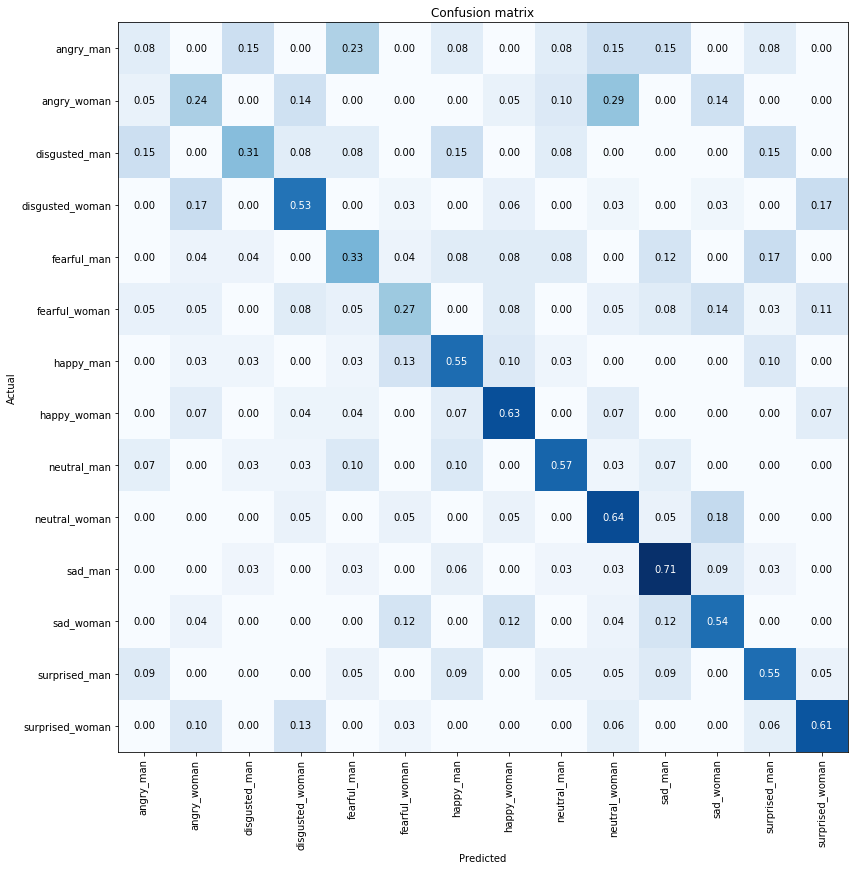

In [76]:
interp.plot_confusion_matrix(figsize=(12,12), normalize=True)

## Clean up dataset

In [54]:
from fastai.widgets import *

In [89]:
db = (data)

In [57]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('/course-v3/nbs/dl1/wandb/run-20200516_064855-12hgr9f7/bestmodel');

In [58]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [61]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

In [88]:
doc(ImageCleaner)

In [34]:
print('classes:', len(ds.classes))
print('samples in training:', len(ds.train_ds))
print('samples in validation:', len(ds.valid_ds))

classes: 14


AttributeError: train_ds